In [1]:
# The Usual
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
listings = pd.read_csv("listings_Average_score.csv", usecols=['id', 'review_scores_rating'])
listings = listings.dropna()
listings = listings.rename(columns={'id': 'listing_id'})

reviews = pd.read_csv("reviews.csv", usecols=['listing_id', 'comments'])

In [3]:
df = pd.merge(listings, reviews, on='listing_id')

In [4]:
topics =["need", "time", "make", "place", "amazing", "go", "get", "come", "experience", "back", "room", "bed",
         "day", "night", "bathroom", "little", "people", "bedroom", "arrival", "small", "nice", "good", "really",
         "close", "walk", "subway", "area", "neighborhood", "restaurant", "lot", "great", "place", "host", "location",
         "recommend", "easy", "clean", "super", "check", "highly", "stay", "apartment", "would", "clean",
         "comfortable", "definitely", "perfect", "space", "well", "feel"]


# Frequency of hot keywords per listing

In [31]:
high_scores = {}
for i in df.values:
    if i[1] >= 0:
        count = 0
        for word in topics:
            if word in str(i[2]):
                count += 1
                high_scores[i[0]] = count
        

In [32]:
high_scores

{3831: 3,
 5022: 2,
 5099: 3,
 5121: 2,
 5178: 6,
 5203: 8,
 5222: 9,
 5238: 5,
 5295: 8,
 5441: 5,
 5803: 6,
 6021: 10,
 6090: 3,
 6848: 18,
 7097: 7,
 7322: 23,
 7726: 12,
 7801: 16,
 8024: 5,
 8110: 4,
 8490: 3,
 8505: 4,
 9357: 10,
 9657: 5,
 9668: 9,
 9704: 2,
 9782: 5,
 9783: 15,
 10452: 5,
 10962: 19,
 11174: 3,
 11708: 5,
 12048: 5,
 12192: 2,
 12299: 10,
 12303: 1,
 12318: 4,
 12343: 9,
 12627: 9,
 12937: 11,
 12940: 17,
 13050: 12,
 13394: 7,
 13808: 15,
 14287: 9,
 14290: 9,
 14314: 3,
 14322: 10,
 14377: 3,
 14468: 11,
 14991: 4,
 15220: 1,
 15338: 4,
 15341: 8,
 15385: 4,
 15396: 13,
 15711: 9,
 15729: 2,
 16326: 6,
 16338: 14,
 16421: 7,
 16458: 11,
 16580: 17,
 16595: 3,
 16821: 5,
 16974: 1,
 17037: 4,
 17092: 9,
 17693: 7,
 17747: 9,
 18127: 9,
 18195: 15,
 18198: 10,
 18590: 12,
 18728: 8,
 18764: 8,
 19159: 12,
 19169: 11,
 19282: 2,
 19601: 12,
 19812: 3,
 20299: 3,
 20300: 19,
 20611: 13,
 20724: 3,
 20734: 4,
 20755: 18,
 20853: 16,
 20913: 4,
 21293: 3,
 21456: 3

In [33]:
low_scores = {}
for i in df.values:
    if i[1] <= 70:
        count = 0
        for word in topics:
            if word in str(i[2]):
                count += 1
                low_scores[i[0]] = count

In [34]:
low_scores

{20300: 19,
 36442: 3,
 53137: 1,
 342027: 1,
 726692: 1,
 794535: 2,
 830840: 4,
 833519: 2,
 843499: 11,
 846470: 6,
 849495: 3,
 908923: 3,
 1273533: 2,
 1654738: 9,
 1850695: 9,
 1871261: 9,
 1925519: 6,
 1947400: 7,
 2038278: 3,
 2082670: 6,
 2104119: 10,
 2284809: 8,
 2671737: 16,
 3048234: 3,
 3052904: 2,
 3060745: 11,
 3420648: 3,
 3624205: 7,
 3646551: 9,
 3693901: 4,
 3742519: 12,
 3957619: 2,
 4127524: 11,
 4204302: 6,
 4232865: 13,
 4244476: 12,
 4295603: 20,
 4378176: 12,
 4493474: 1,
 4663804: 11,
 4667146: 2,
 4677056: 14,
 4725251: 15,
 4758601: 9,
 4775278: 3,
 4831703: 8,
 4838260: 7,
 4838540: 1,
 4848528: 6,
 4865749: 3,
 4948928: 3,
 4976919: 14,
 5259407: 3,
 5361021: 26,
 5364814: 11,
 5376069: 2,
 5423135: 5,
 5550788: 7,
 5695566: 5,
 5842819: 16,
 6031895: 3,
 6168663: 2,
 6209799: 5,
 6225935: 7,
 6316666: 17,
 6402424: 8,
 6423799: 13,
 6467264: 23,
 6554879: 2,
 6576327: 2,
 6776711: 8,
 6884254: 15,
 6887405: 8,
 6991910: 11,
 7015831: 1,
 7024079: 13,
 71

# Review Score vs. Keyword Ferequency

In [35]:
listings

,listing_id,review_scores_rating
1,3831,90.0
2,5022,93.0
3,5099,89.0
4,5121,90.0
5,5178,83.0
...,...,...
48095,38449131,100.0
48097,38450474,100.0
48144,38469091,100.0
48176,38483932,100.0


In [36]:
# cols = listing_id, frequency, avg. score
df2 = pd.DataFrame(list(high_scores.items()), columns = ['listing_id', 'frequency'])

df2 = pd.merge(df2, listings, on='listing_id')

In [37]:
df2

,listing_id,frequency,review_scores_rating
0,3831,3,90.0
1,5022,2,93.0
2,5099,3,89.0
3,5121,2,90.0
4,5178,6,83.0
...,...,...,...
37453,38448105,5,100.0
37454,38450474,5,100.0
37455,38469091,9,100.0
37456,38483932,20,100.0


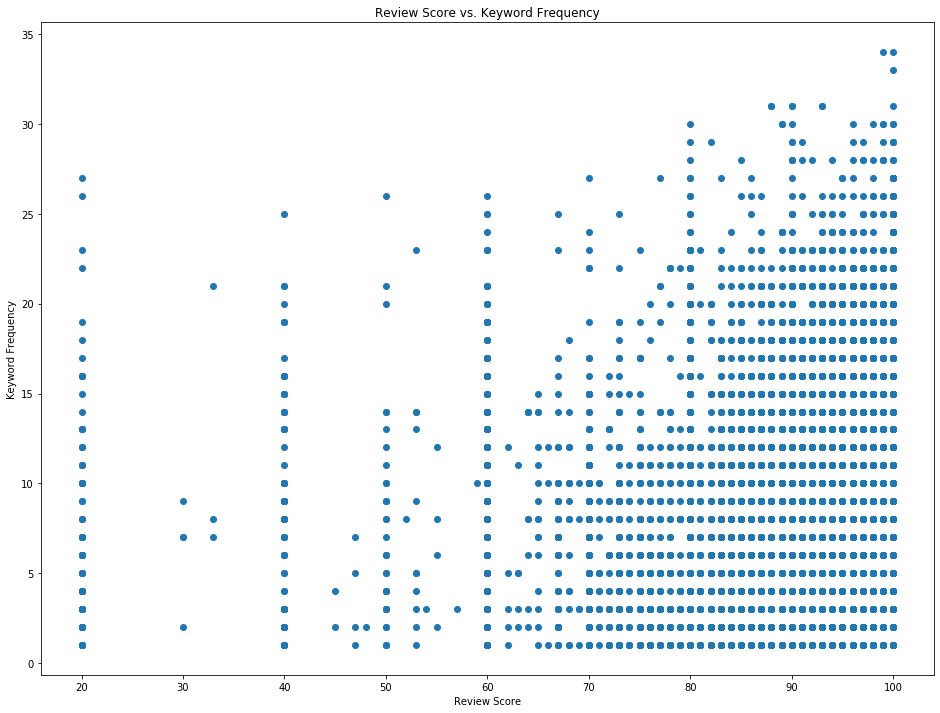

In [43]:
plt.figure(num=None, figsize=(16, 12))
plt.title('Review Score vs. Keyword Frequency')
plt.xlabel('Review Score')
plt.ylabel('Keyword Frequency')
plt.scatter(df2['review_scores_rating'], df2['frequency'], )